# Часть 1. Проверка гипотезы в Python и составление аналитической записки

## Напишите заголовок первой части проекта здесь

- Автор: Ососов Ян
- Дата: 28.08.2025

## Цели и задачи проекта


Цель:проверить гипотезу, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении по сравнению с пользователями из Москвы

Задачи:
1. Определить тип, а также сформировать нулевую и альтернативные гипотезы
2. Проверить наличие дубликатов в идентификаторах пользователей, сравнить размеры групп и их статистики
3. Обосновать выбор t-теста и задать уровень статистической значимости
4. Провести тест, получить p-value
5. Интерпретация результатов

## Описание данных


Таблица содержит слеедующие столбцы:
1.  `city`- город пользователя
2.  `puid`- идентификатор пользователя
3.  `hours`- общее количество часов активности

## Содержимое проекта

---

Основные шаги:
1. Загрузка и знакомство с данными
2. Проверка гипотезы
3. Интерпретация результатов выводы, аналитическая записка

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

Знакомство с даными

In [4]:
df = pd.read_csv('/datasets/yandex_knigi_data.csv')

display(df.info())
display(df.head())

df = df.drop('Unnamed: 0', axis=1)
##Какой-то лишний столбик он нам не нужен(дублирует индексы и ничего больше не отражает)
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


None

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


None

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуем статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Проверка наличия дубликатов(независимость выборок)

In [5]:
display(df.duplicated().sum())

0

Дубликатов нет - выборки не пересекаются

In [6]:
display(df['puid'].duplicated().sum())
display(df.shape[0])
df = df.drop_duplicates(subset=['puid'])
display(df.shape[0])

244

8784

8540

Сравнение размеров групп и их статистик

In [7]:
df.groupby('city')['city'].count()

city
Москва             6234
Санкт-Петербург    2306
Name: city, dtype: int64

Посмотрим на распределения внутри групп

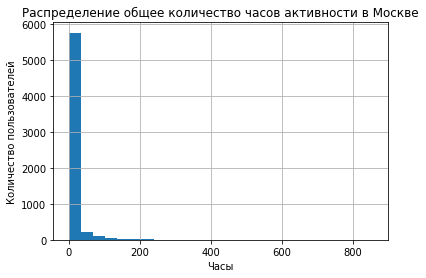

In [8]:
df[df['city'] == 'Москва']['hours'].hist(bins=25)
plt.title('Распределение общее количество часов активности в Москве')
plt.xlabel('Часы')
plt.ylabel('Количество пользователей')
plt.show()

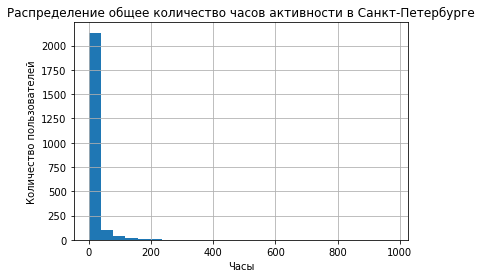

In [9]:
df[df['city'] == 'Санкт-Петербург']['hours'].hist(bins=25)
plt.title('Распределение общее количество часов активности в Санкт-Петербурге')
plt.xlabel('Часы')
plt.ylabel('Количество пользователей')
plt.show()

In [10]:
display(df[df['city'] == 'Санкт-Петербург']['hours'].quantile(0.98))
display(df[df['city'] == 'Москва']['hours'].quantile(0.98))

102.44417499747495

112.6675477444449

Видно что есть хвосты, которые явно будут мешать уберем

In [11]:
df = df[df['hours'] <= df['hours'].quantile(0.98)]

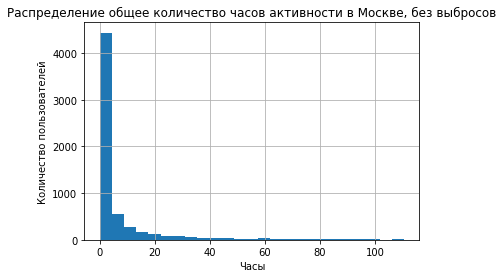

In [12]:
df[df['city'] == 'Москва']['hours'].hist(bins=25)
plt.title('Распределение общее количество часов активности в Москве, без выбросов')
plt.xlabel('Часы')
plt.ylabel('Количество пользователей')
plt.show()

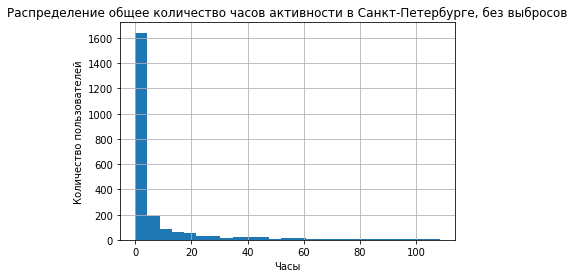

In [13]:
df[df['city'] == 'Санкт-Петербург']['hours'].hist(bins=25)
plt.title('Распределение общее количество часов активности в Санкт-Петербурге, без выбросов')
plt.xlabel('Часы')
plt.ylabel('Количество пользователей')
plt.show()

In [14]:
df[df['city'] == 'Санкт-Петербург'].describe()

,puid,hours
count,2.263000e+03,2263.000000
mean,5.493659e+12,7.265889
std,7.860860e+13,16.029868
min,1.049230e+05,0.000025
25%,3.610112e+08,0.055090
50%,9.302009e+08,0.794721
75%,1.542776e+09,5.307782
max,1.130000e+15,108.310507


In [15]:
df[df['city'] == 'Москва'].describe()

,puid,hours
count,6.106000e+03,6106.000000
mean,1.128979e+13,6.818320
std,1.123880e+14,15.438510
min,9.668000e+03,0.000018
25%,3.159520e+08,0.057240
50%,8.757609e+08,0.855786
75%,1.517035e+09,5.310970
max,1.130000e+15,110.595985


Выброки пользоввателей по городам независимые, 
Несмотря на то что группы по городам сильно различаются по количеству пользователей, их количетво достаточное чтобы быть нормальным более 30, также после фильтрации выбросов(больше 100 часов в месяц слушать подкасты довольно много, как будто кто-то мог засыпать под это, что повлияло на слишком большие цифры средней активвности) , визуальной оценки двух графиков распределений а также сраввнения значений дисперсий ввыборок(стандартные отклонения выборок сравнимы 16,0 для Спб и 15,4 для Мск) было принято использовать двухвыборочный тест стьюдента
уровень статистической значимости оставим как и везде альфа = 0.05

In [16]:
def print_stattest_results(p_value:float, alpha:float = 0.05):
    if p_value < alpha:
        print(f'Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
    else:
        print(f'Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

In [17]:
df_Msc = df[df['city'] == 'Москва']['hours']
df_SPb = df[df['city'] == 'Санкт-Петербург']['hours']

results = st.ttest_ind(df_SPb  ,df_Msc ,alternative= 'greater') 
p_value = results.pvalue
print_stattest_results(round(p_value, 4))

Полученное значение p_value=0.1219 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


## 3. Аналитическая записка


- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



Перед проедением статистического теста была проведена проверка на независимость данныых в выборках
Также было проведено сравнения рраспределений групп пользователей по городам
По результатам было принято решение использовать двухвыборочный t-тест стьюдента 
Уровень статистической значимости альфа = 0.05
Полученное значение p_value=0.1219 больше критического уровня alpha=0.05. отвергаем альтернативную гипотезу ,что средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо
Причины:
Сильное влияние хвостов на гипотезу кажется что среднее больше, но лишь из-за того что в Спб слушают ультрадолго и такх людей больше, если к примеру обрезать данные по 80 квантилю то гипотез обратится в другую стороны и в среднем в Мосвке будут слушать долдбше
Еще данных по спб в 3 раза мемньше выбросы имеют более сильное влияние на среднее от  чего заблуждение

----

# Часть 2. Анализ результатов A/B-тестирования

Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

задача — провести оценку результатов A/B-теста.

## 1. Опишите цели исследования.



Задача — провести оценку результатов A/B-теста
Цель исследования: проверить гипоотезу, что упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта

## 2. Знакомство с данными


In [18]:
participants = pd.read_csv('1')
events = pd.read_csv('2',
                     parse_dates=['event_dt'], low_memory=False)

In [19]:
display(participants.head())
display(participants.info())

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


None

In [20]:
display(events.head())
display(events.info())

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


None

данные соответвуют описанию, пропуски есть только в столбце details, но вероятно наличие пропуков в этом столбцу нормально

In [21]:
display(events.duplicated().sum())
display(participants.duplicated().sum())

display(events.shape[0])
events = events.drop_duplicates()
display(events.shape[0])


36318

0

787286

750968

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [22]:
participants['ab_test'].unique()

array(['interface_eu_test', 'recommender_system_test'], dtype=object)

In [23]:
participants_int = participants[participants['ab_test'] == 'interface_eu_test']
participants_rec = participants[participants['ab_test'] == 'recommender_system_test']

participants_int_a = participants_int[participants_int['group'] == 'A']
participants_int_b = participants_int[participants_int['group'] == 'B']
display(participants_int_a.shape[0], participants_int_b.shape[0])
P = round(100*abs(participants_int_a.shape[0] - participants_int_b.shape[0])/participants_int_a.shape[0],2)
display(P)
intersec = set(participants_int['user_id']) & set(participants_rec['user_id'])
display(len(intersec))

5383

5467

1.56

887


Пользователи распределены равномерно процентная разница в количестве пользователей в группах A и B 1.56 процент что допустимо 
но есть пересечения с другим тестом среди пользователей, такого быть не должно удалим этих пользователей и посчитаем все заново

In [24]:
participants_new = participants[~participants['user_id'].isin(intersec)]
participants_new.shape

(12751, 4)

In [25]:
participants_int = participants_new[participants_new['ab_test'] == 'interface_eu_test']
participants_rec = participants_new[participants_new['ab_test'] == 'recommender_system_test']

participants_int_a = participants_int[participants_int['group'] == 'A']
participants_int_b = participants_int[participants_int['group'] == 'B']
display(participants_int_a.shape[0], participants_int_b.shape[0])
P = round(100*abs(participants_int_a.shape[0] - participants_int_b.shape[0])/participants_int_a.shape[0],2)
display(P)
intersec = set(participants_int['user_id']) & set(participants_rec['user_id'])
display(len(intersec))

4952

5011

1.19

0

Пользователей участвующих в двух тестах сразу убрали - соотношение не поменялось

In [26]:
intersec = set(participants_int_a['user_id']) & set(participants_int_b['user_id'])
display(len(intersec))

0

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [27]:
display(events['event_name'].unique())

array(['End of Black Friday Ads Campaign', 'registration', 'product_page',
       'login', 'product_cart', 'purchase',
       'Start of Christmas&New Year Promo',
       'Start of CIS New Year Gift Lottery'], dtype=object)

In [28]:
events_df = events[(events['event_name'] == 'registration') | (events['event_name'] == 'purchase')]
display(events_df['event_name'].unique())

array(['registration', 'purchase'], dtype=object)

In [29]:
df = participants_int.merge(events_df[events_df['event_name'] == 'registration'], how='left', on='user_id') 
df.info()
df = df.merge(events_df[events_df['event_name'] == 'purchase'], how='left', on='user_id') 
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9963 entries, 0 to 9962
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     9963 non-null   object        
 1   group       9963 non-null   object        
 2   ab_test     9963 non-null   object        
 3   device      9963 non-null   object        
 4   event_dt    9963 non-null   datetime64[ns]
 5   event_name  9963 non-null   object        
 6   details     9963 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 622.7+ KB


,user_id,group,ab_test,device,event_dt_x,event_name_x,details_x,event_dt_y,event_name_y,details_y
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38,NaT,NaN,NaN
1,001E72F50D1C48FA,A,interface_eu_test,Mac,2020-12-17 15:44:05,registration,-3.61,NaT,NaN,NaN
2,002412F1EB3F6E38,B,interface_eu_test,Mac,2020-12-09 09:36:50,registration,-0.48,NaT,NaN,NaN
3,002540BE89C930FB,B,interface_eu_test,Android,2020-12-08 18:06:07,registration,-2.38,NaT,NaN,NaN
4,0031F1B5E9FBF708,A,interface_eu_test,Android,2020-12-14 00:47:10,registration,-2.26,2020-12-15 18:54:51,purchase,4.99


In [30]:
df['life_time'] = df['event_dt_y'] - df['event_dt_x']
df['life_time'] = df['life_time'].dt.days

In [31]:
df_new = df.groupby('user_id')[[ 'group', 'ab_test', 'device', 'life_time']].min().reset_index()
df_new['is_pur'] = ~df_new['life_time'].isna()
df_new

,user_id,group,ab_test,device,life_time,is_pur
0,0002CE61FF2C4011,B,interface_eu_test,Mac,NaN,False
1,001E72F50D1C48FA,A,interface_eu_test,Mac,NaN,False
2,002412F1EB3F6E38,B,interface_eu_test,Mac,NaN,False
3,002540BE89C930FB,B,interface_eu_test,Android,NaN,False
4,0031F1B5E9FBF708,A,interface_eu_test,Android,1.0,True
...,...,...,...,...,...,...
9958,FFE5B14BD55C1C5C,A,interface_eu_test,PC,NaN,False
9959,FFE600EEC4BA7685,B,interface_eu_test,Android,NaN,False
9960,FFE7FC140521F5F6,A,interface_eu_test,PC,3.0,True
9961,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,NaN,False


In [32]:
#Немноого украл
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости(1 - достоверность теста 95%)
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста 80%
p = 0.3 # базовый показатель конверсии — 30%
mde = 0.1 * p  # Минимальный детектируемый эффект 3%
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 3761


In [35]:
df_res = df_new.groupby('group')['is_pur'].agg(['count', 'sum'])
df_res['part'] = round(df_res['sum'] / df_res['count'], 4)
df_res

,count,sum,part
group,,,
A,4952,1638,0.3308
B,5011,1782,0.3556


### предварительный вывод

конверсия возрасла, при сравнении средней конверсии тестовых выборок на три процента(если быыть точнее на 2,6 что не соввпадает с ожидаемым), однако для принятия окончательнго решения необходимо провести статистический тест

## 4. Проведите оценку результатов A/B-тестирования:

Гипотеза: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится
Нулевая гипотеза: Изменения никак не повлияют на коверсию
Альтернативня гипотеза: Изменения аповвысят конверсию

Сравниваем конверсии

В данном случа целесообразно и удобно применить тест Стьюдента

In [34]:
df_a = df_new[df_new['group']=='A']['is_pur']
df_b = df_new[df_new['group']=='B']['is_pur']

test_result = st.ttest_ind(
    df_a,
    df_b,
    alternative='less' 
)
print_stattest_results(round(test_result.pvalue, 4))

Полученное значение p_value=0.0045 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

По результатам A/B-тестирования полученное значение p_value=0.0045 меньше критического уровня alpha=0.05, что значит что гипотезу о том что конверсия повысится принять можно

Самое банальное приветственные бонусы в честь регистрации, или скидка в первую неделю после регистрации, что заствит почувствовать выгоду покупателя и совершить покупку пока действует акция условно